In [14]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
from scipy.interpolate import lagrange##插值处理

In [15]:
data = pd.read_excel('E:/vcdata/VCAndGDP(GDP2).xlsx') ###GDP ！= null
data2 = pd.read_excel('E:/vcdata/VCAndGDP(GDPployin).xlsx') ###GDP ！= null

In [16]:
data.iloc[0:1,3:3+27] 

,1991总投资金额(M),1992总投资金额(M),1993总投资金额(M),1994总投资金额(M),1995总投资金额(M),1996总投资金额(M),1997总投资金额(M),1998总投资金额(M),1999总投资金额(M),2000总投资金额(M),...,2008总投资金额(M),2009总投资金额(M),2010总投资金额(M),2011总投资金额(M),2012总投资金额(M),2013总投资金额(M),2014总投资金额(M),2015总投资金额(M),2016总投资金额(M),2017总投资金额(M)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,463.6,NaN,600.0,NaN,0.0,NaN,NaN,43.6,NaN


In [17]:
dataAmount = data.iloc[:,3:3+27] ###amount
AmountFind = []
Amount0 = []
AmountUnknown = []
for i in dataAmount.columns:
    amountFind = 0
    amount0 = 0
    amountUnknown = 0
    for j in range(dataAmount.shape[0]):
        if dataAmount[i][j] == 0:
            amount0 += 1
        elif math.isnan(dataAmount[i][j]):
            amountUnknown += 1
        else:
            amountFind += 1
    AmountFind.append(amountFind)
    Amount0.append(amount0)
    AmountUnknown.append(amountUnknown)

In [18]:
len(AmountFind + AmountUnknown + Amount0),dataAmount.shape[0]

(81, 276)

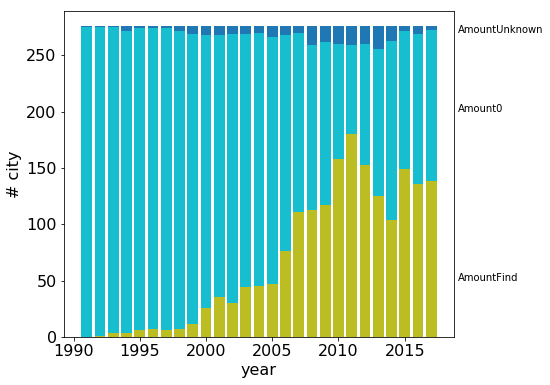

In [19]:
plt.figure(figsize=(7,6))
plt.xlabel('year',fontsize=16)
plt.ylabel('# city',fontsize=16)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
for i in range(27):
    plt.bar(x,AmountFind, zorder=4) 
    plt.bar(x,[AmountFind[i] + AmountUnknown[i] for i in range(len(AmountUnknown))], zorder=3) 
    plt.bar(x,[AmountFind[i] + AmountUnknown[i] +Amount0[i] for i in range(27)], zorder=2) 
plt.text(2019,50,'AmountFind')
plt.text(2019,200,'Amount0')
plt.text(2019,270,'AmountUnknown')
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6a.pdf', bbox_inches='tight')
plt.show()

In [21]:
data2.iloc[0:1,3:3+27]

,1991总投资金额(M),1992总投资金额(M),1993总投资金额(M),1994总投资金额(M),1995总投资金额(M),1996总投资金额(M),1997总投资金额(M),1998总投资金额(M),1999总投资金额(M),2000总投资金额(M),...,2008总投资金额(M),2009总投资金额(M),2010总投资金额(M),2011总投资金额(M),2012总投资金额(M),2013总投资金额(M),2014总投资金额(M),2015总投资金额(M),2016总投资金额(M),2017总投资金额(M)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,463.6,531.8,600.0,NaN,0.0,NaN,NaN,43.6,NaN


In [22]:
dataAmount = data2.iloc[:,3:3+27] ###amount
AmountFind = []
Amount0 = []
AmountUnknown = []
for i in dataAmount.columns:
    amountFind = 0
    amount0 = 0
    amountUnknown = 0
    for j in range(dataAmount.shape[0]):
        if dataAmount[i][j] == 0:
            amount0 += 1
        elif math.isnan(dataAmount[i][j]):
            amountUnknown += 1
        else:
            amountFind += 1
    AmountFind.append(amountFind)
    Amount0.append(amount0)
    AmountUnknown.append(amountUnknown)

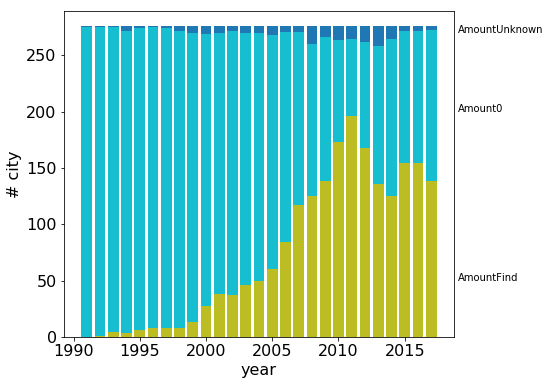

In [23]:
plt.figure(figsize=(7,6))
plt.xlabel('year',fontsize=16)
plt.ylabel('# city',fontsize=16)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
for i in range(27):
    plt.bar(x,AmountFind, zorder=4) 
    plt.bar(x,[AmountFind[i] + AmountUnknown[i] for i in range(len(AmountUnknown))], zorder=3) 
    plt.bar(x,[AmountFind[i] + AmountUnknown[i] +Amount0[i] for i in range(27)], zorder=2) 
plt.text(2019,50,'AmountFind')
plt.text(2019,200,'Amount0')
plt.text(2019,270,'AmountUnknown')
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6b(插值）.pdf', bbox_inches='tight')
plt.show()